In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import numpy as np
from math import floor
from scipy.integrate import solve_ivp

from mentevo.utils import gaussian_g_vector, build_forward_matrix, build_cue_vector
from mentevo.plots import plot_curves
from mentevo.experiment import Experiment
from mentevo.metrics import compute_performance

In [15]:
import matplotlib.pyplot as plt

def set_size(w, h):
  plt.figure(figsize=(w, h))

d = 0.2
tau = 10.0
alpha = 0.03
beta = 0.01
gamma = 0.02

DATA = {}

for nb_informed in [1, 2, 3, 4]:
  DATA[nb_informed] = {}
  for nb_switches in [2, 4, 6, 8, 10, 12, 14]:
    DATA[nb_informed][nb_switches] = {}

    for g in np.linspace(0.5, 9.0, 100):

      experiment = Experiment(number_of_agents=4,
                              number_of_tasks=2,
                              communication_graph=None,
                              task_graph=None,
                              alpha=alpha,
                              beta=beta,
                              gamma=gamma,
                              delta=0.0,
                              d=d,
                              tau=tau,
                              g=np.array([g, g, g, g]),
                              bias_value=0.1,
                              initial_state=None,
                              total_time=4_000,
                              nb_switches=nb_switches,
                              nb_informed=nb_informed)

      curves = experiment.solve()
      scores = compute_performance(experiment, curves)
      score = np.mean(scores)

      DATA[nb_informed][nb_switches][g] = score

Text(0, 0.5, 'Best g')

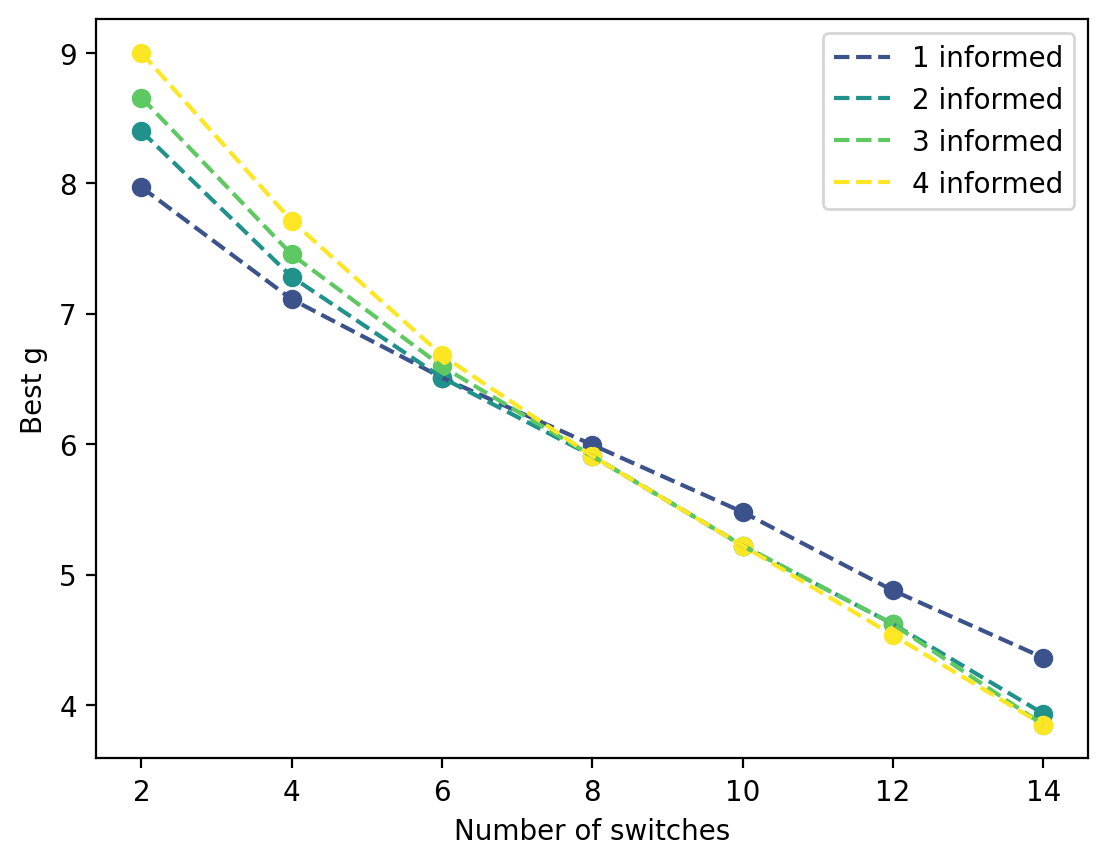

In [17]:
cmap = plt.get_cmap("viridis")

nb_informed = 1

for nb_informed in DATA.keys():
  g_curve = []

  for nb_switches in DATA[nb_informed].keys():
    # look for the best keys
    best_g = max(DATA[nb_informed][nb_switches], key=DATA[nb_informed][nb_switches].get)
    g_curve.append((nb_switches, best_g))

  plt.plot([x for x,y in g_curve], [y for x,y in g_curve], color=cmap(nb_informed/4.0), 
           alpha=1.0, linestyle="--", label=f"{nb_informed} informed")
  for x, y in g_curve:
    plt.scatter(x, y, color=cmap(nb_informed/4.0), alpha=1.0)

plt.legend()
plt.xlabel("Number of switches")
plt.ylabel("Best g")

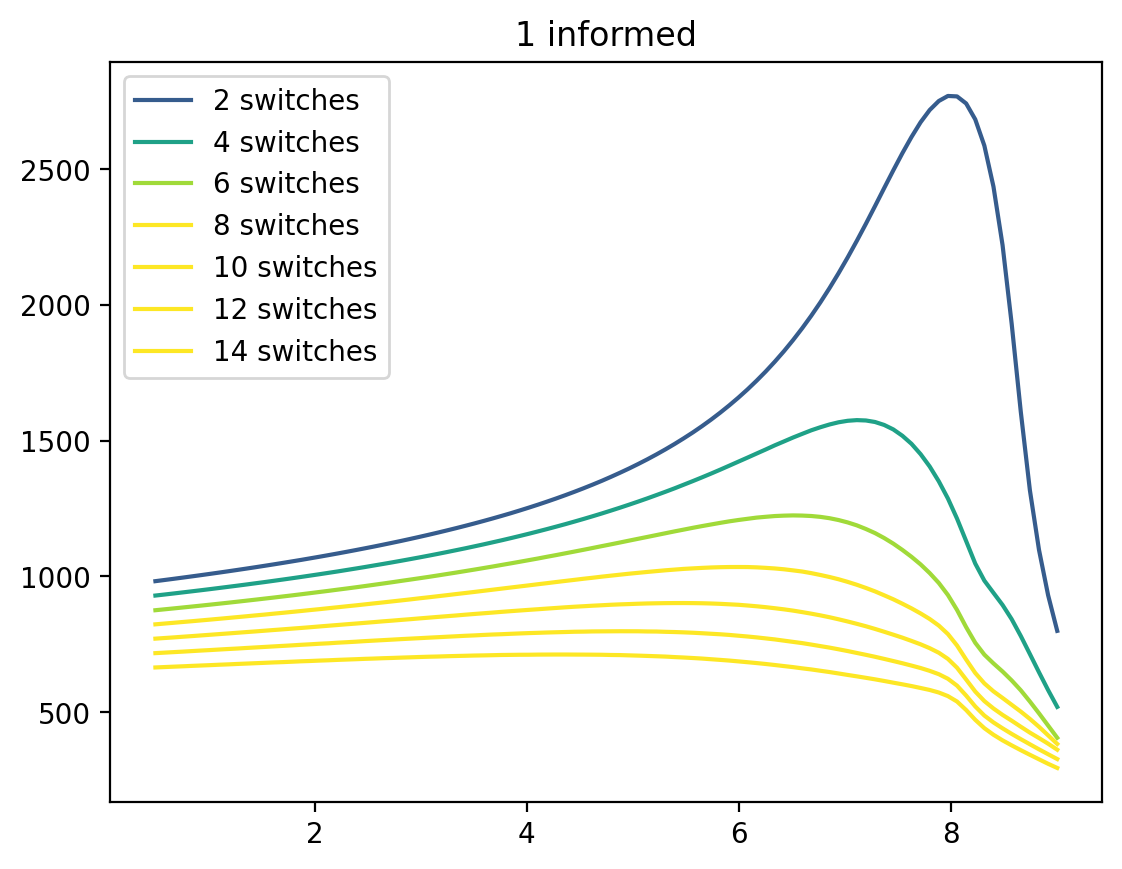

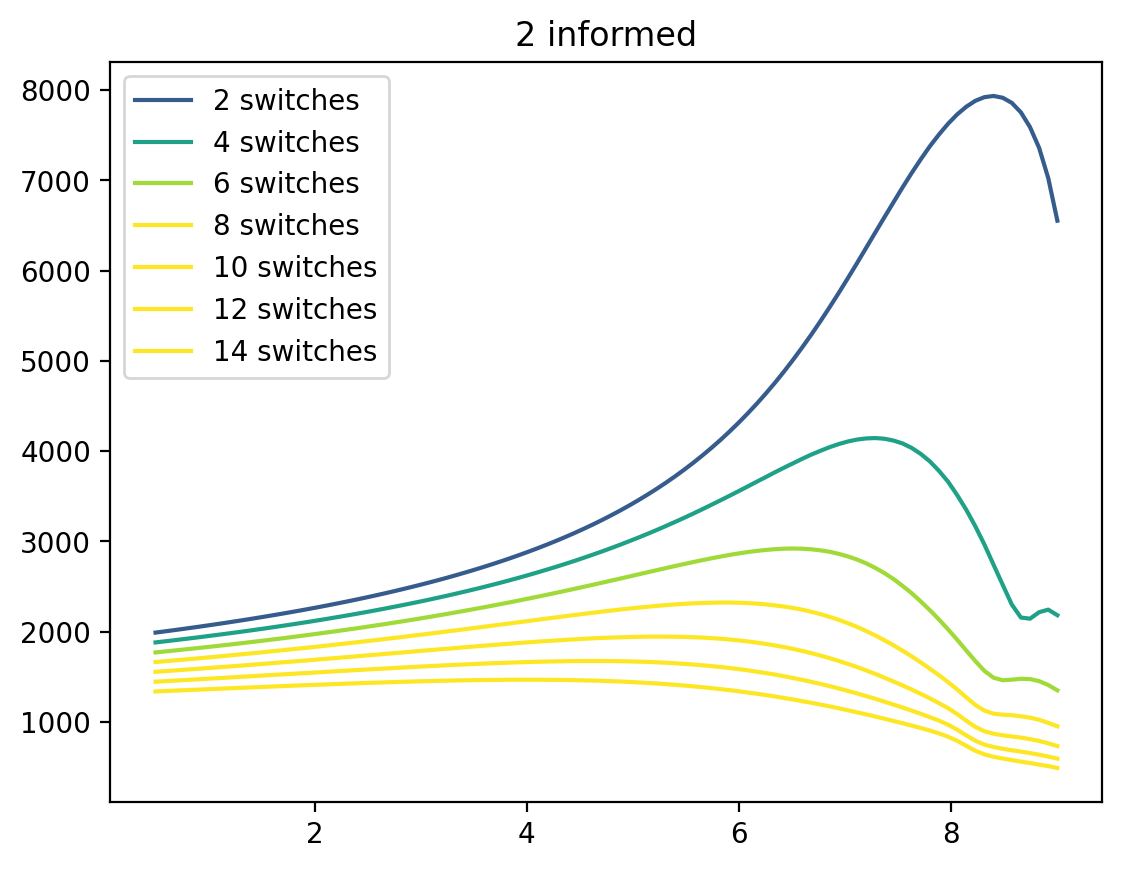

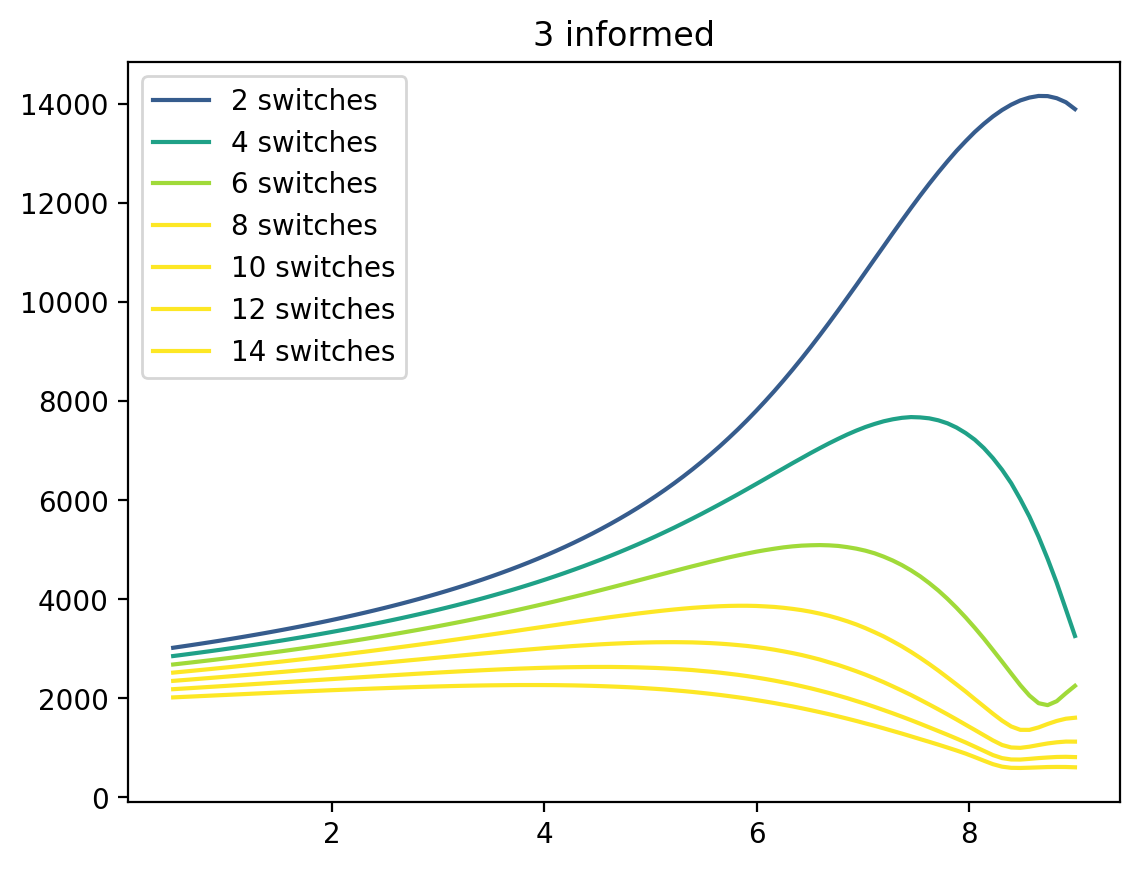

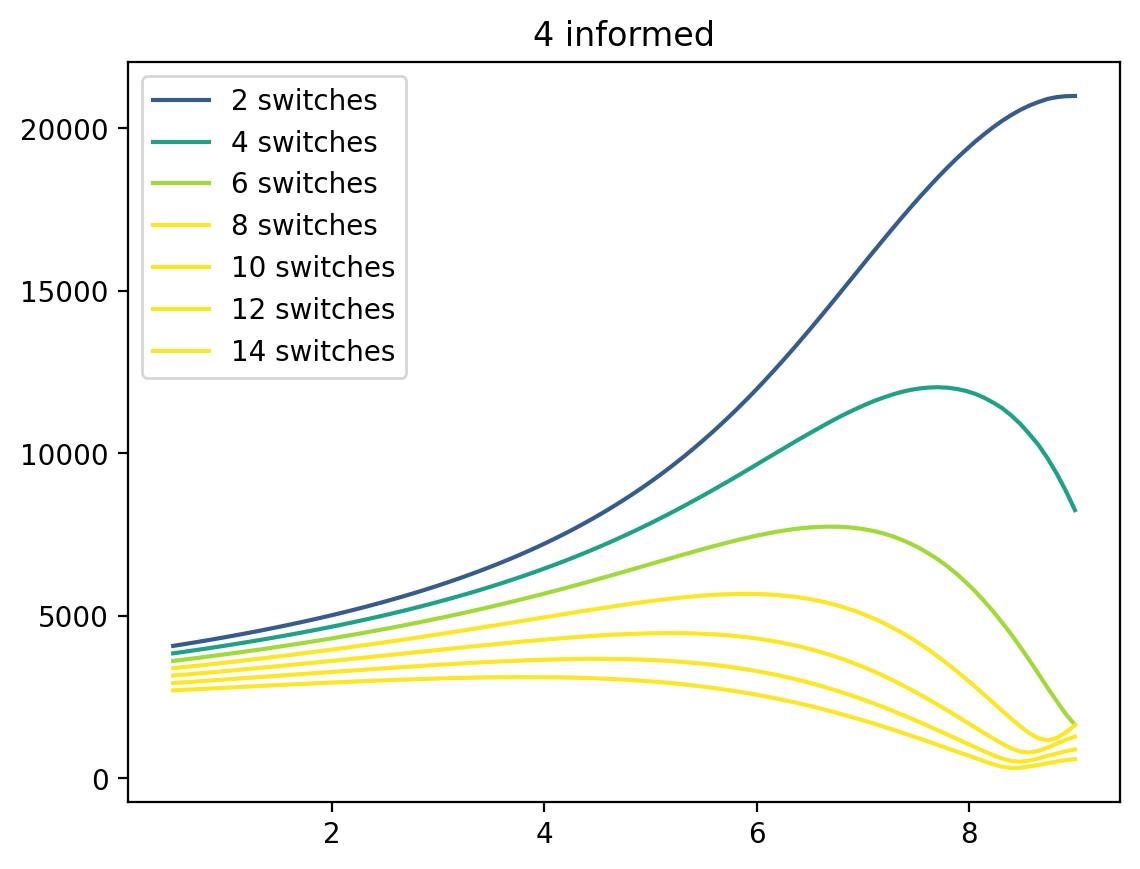

In [19]:
cmap = plt.get_cmap("viridis")

for nb_informed in DATA.keys():

  for s in DATA[nb_informed].keys():
    plt.plot(list(DATA[nb_informed][s].keys()), list(DATA[nb_informed][s].values()),
             label=f"{s} switches", color=cmap(s / len(DATA[nb_informed].keys())))

  plt.title(f"{nb_informed} informed")
  plt.legend()
  plt.show()